## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [370]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [371]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [372]:
from google.colab import drive
drive.mount('/content/drive')
personal_loan_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Loan_Modelling.csv")
data = personal_loan_data.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

* Observations
* Sanity checks

In [373]:
data.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [374]:
data.tail(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [375]:
data.shape

(5000, 14)

Observation : There are 5000 rows of data and 14 columns.

In [376]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Observation : All columns are numerical. Except CCAvg which is float, rest all are integers.
Note that Personal_Loan, Securities_Account, CD_Account, Online and CreditCard are represented in integers but they are binary values(Yes / No).
Note that Education is represented in in intergers but it's levels(Undergrad, Grad, Advanced)

In [377]:
data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Observations
1) Average income is 73.77 thousand dollars
2) Mortgage data is skewed and average value is 56.5 thousand dollars

In [378]:
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


Observations : There are no missing values in the data.

In [379]:
data.duplicated().sum()

0

Observations : There are no duplicate values in the data.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

**Answers**:
1.   Mortgage data is right skewed. And has a lot of outliers on higher value end.No counts between 0-70K and 450K onwards.
2.   There are 1470 customers who have credit cards.
3.   Income(0.50), CCAvg(0.37) and CD_Account(0.32) in that order have the strongest corelation with personal loan attribute.
4. The distribution of loan ranges between age 26 and 65 kind of evenly
5. The customers with Advanced/Professional is the category that has max  of number of loans, followed by Graduate and followed by Undergrad.





# UNIVARIATE ANALYSIS

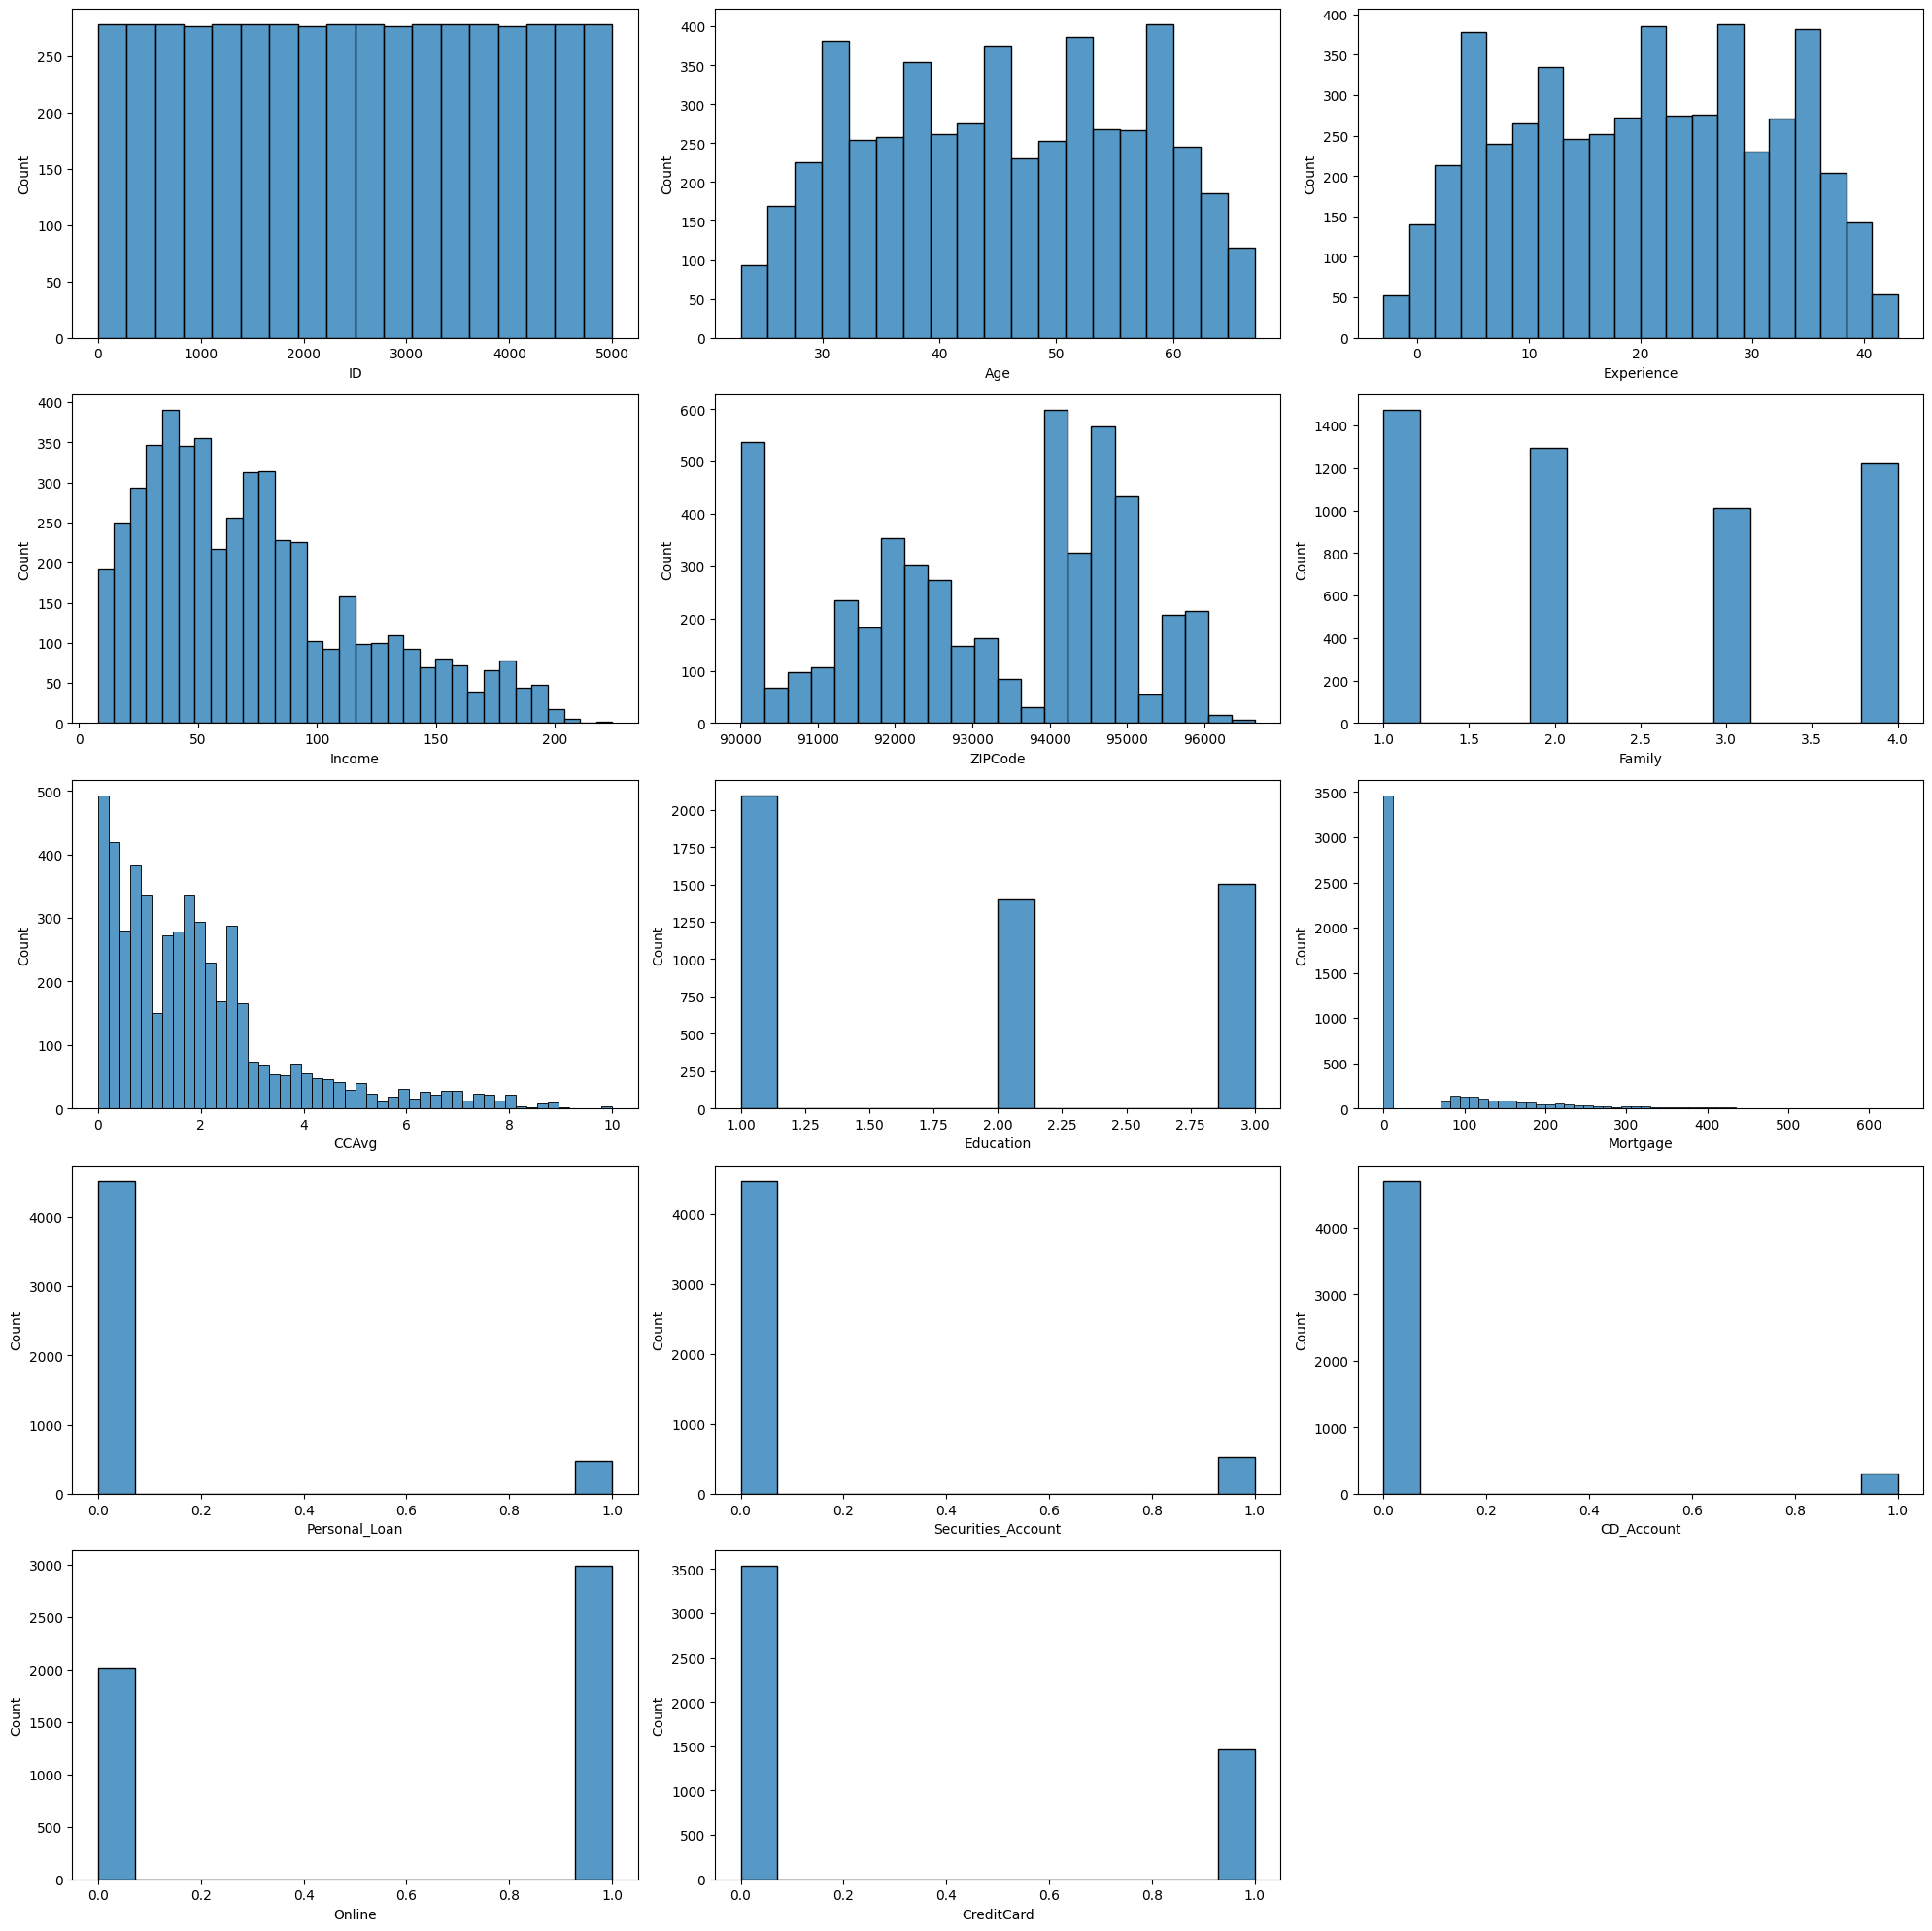

In [380]:
# defining the figure size
plt.figure(figsize=(20, 20))

# plotting the histogram for each numerical feature
for i, feature in enumerate(data.columns):
    plt.subplot(5, 3, i+1)    # assign a subplot in the main plot
    sns.histplot(data=data, x=feature)    # plot the histogram

plt.tight_layout();   # to add spacing between plots

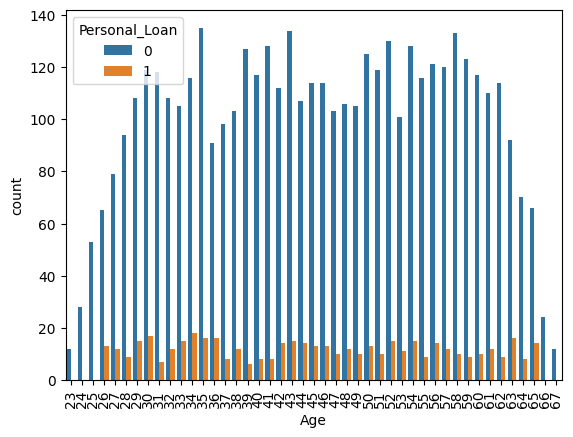

In [381]:
sns.countplot(data = data, x = 'Age', hue = 'Personal_Loan')
plt.xticks(rotation=90);

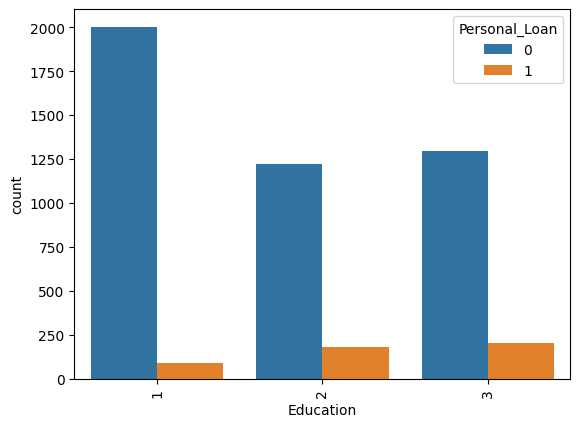

In [382]:
sns.countplot(data = data, x = 'Education', hue = 'Personal_Loan')
plt.xticks(rotation=90);

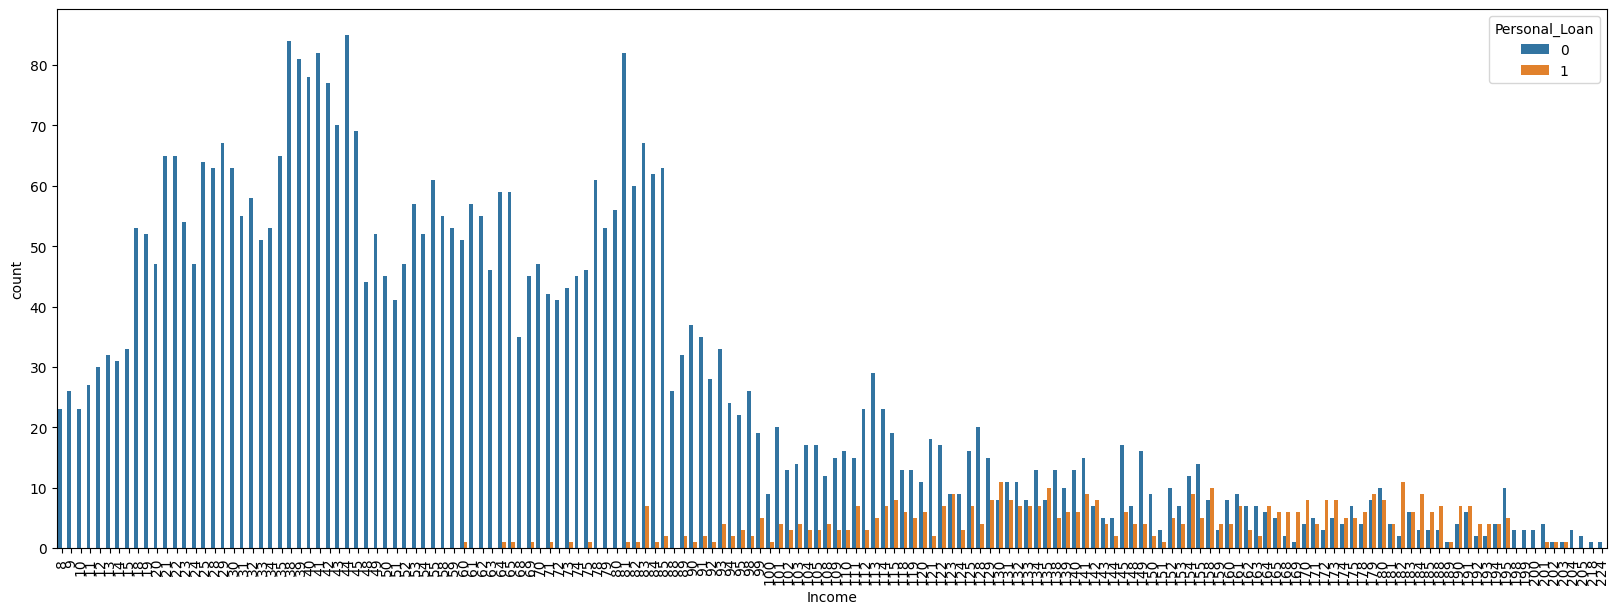

In [383]:
plt.figure(figsize=(20,7))
sns.countplot(data = data, x = 'Income', hue = 'Personal_Loan')
plt.xticks(rotation=90);

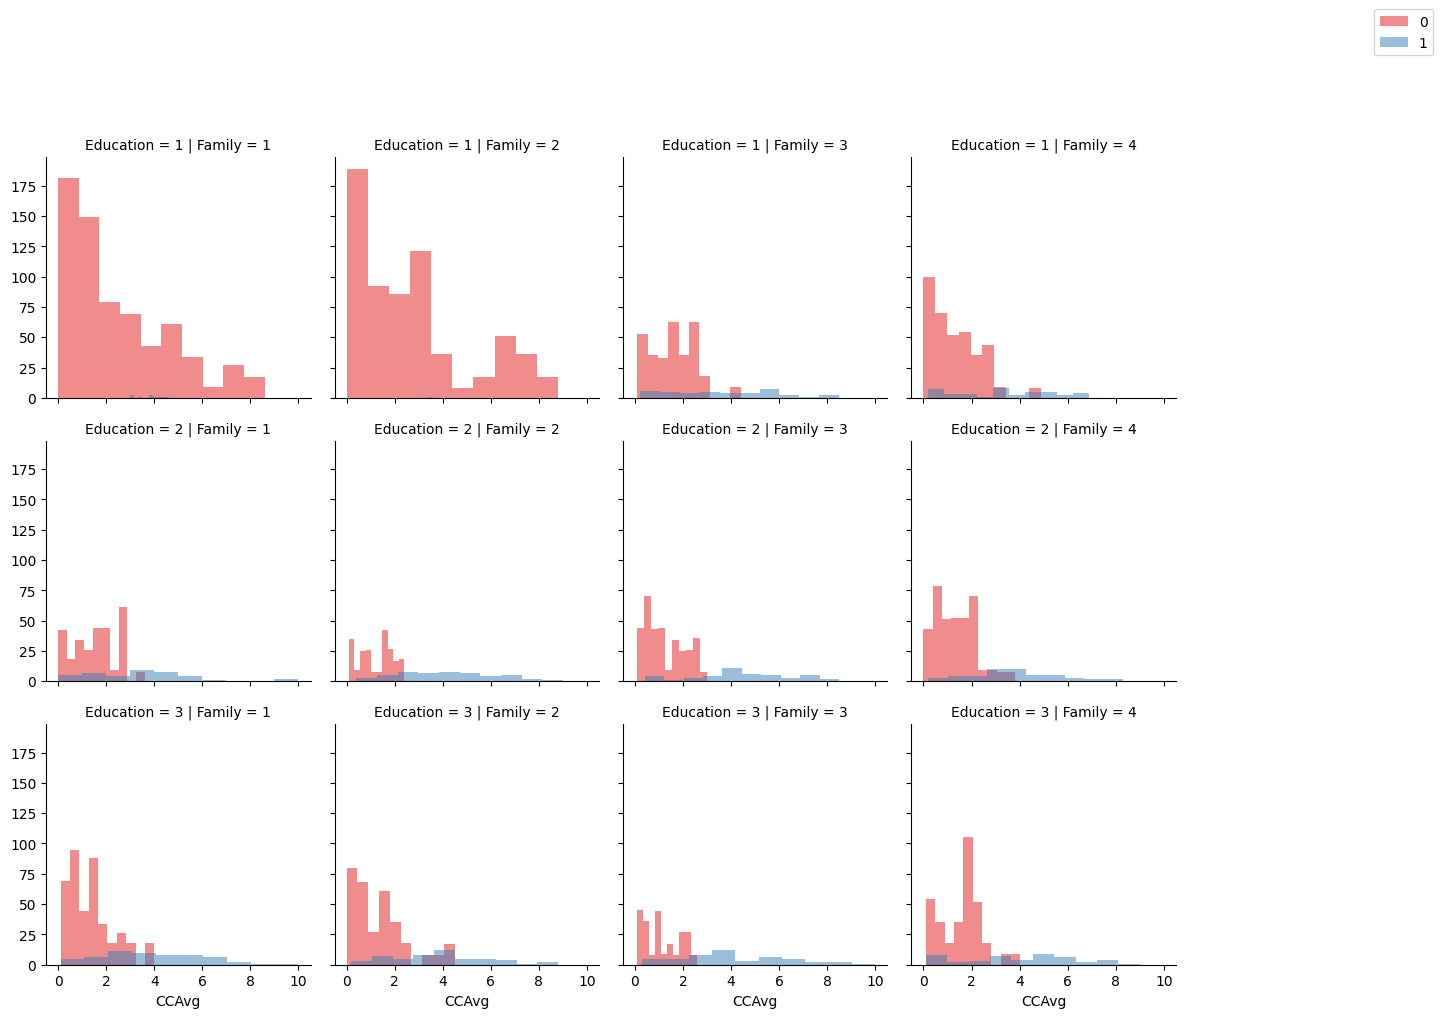

In [384]:
facets=sns.FacetGrid(data,row='Education',col='Family',hue='Personal_Loan',palette='Set1')
facets=facets.map(plt.hist, 'CCAvg', alpha=0.5)
plt.legend(bbox_to_anchor=(2,4))

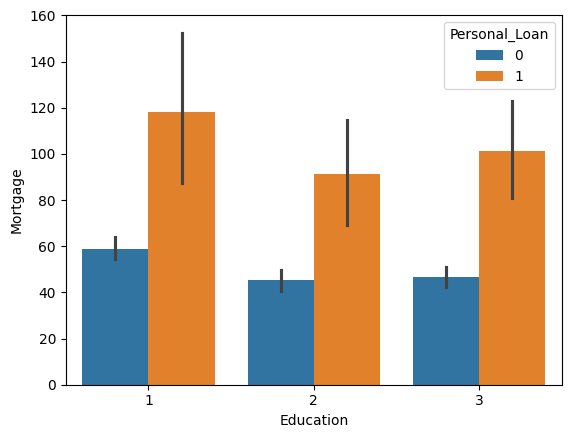

In [385]:
sns.barplot(data=data, x = 'Education', y = 'Mortgage', hue='Personal_Loan')
plt.show()

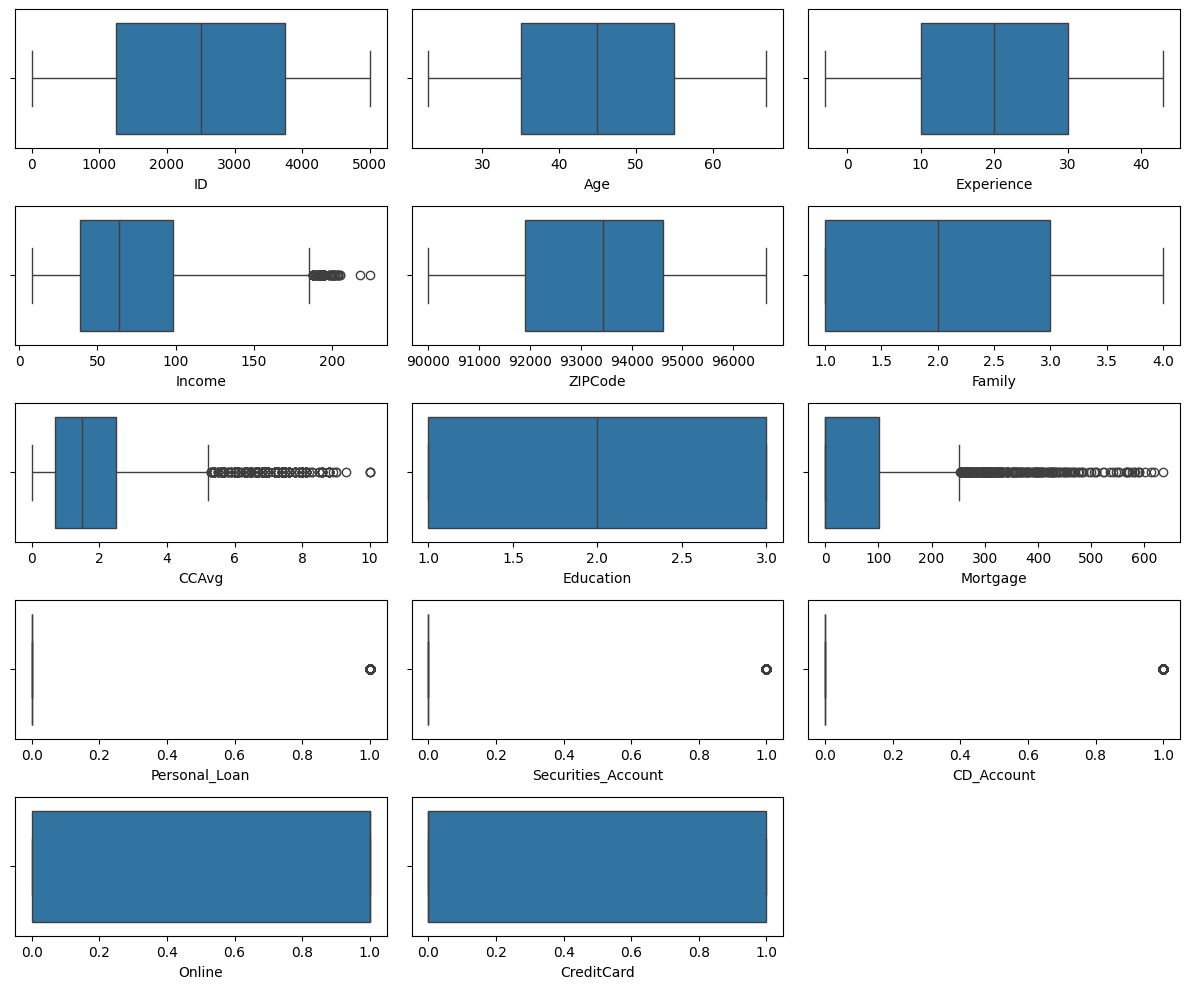

In [386]:
# defining the figure size
plt.figure(figsize=(12, 10))

# plotting the boxplot for each numerical feature
for i, feature in enumerate(data.columns):
    plt.subplot(5, 3, i+1)    # assign a subplot in the main plot
    sns.boxplot(data=data, x=feature)    # plot the boxplot

plt.tight_layout();   # to add spacing between plots

**Observations**:


1.   CCAvg and Mortgage counts have lots of outliers.
2.   Count of loans with people having income less than 60K is nill.
3.   People with Undergrad Education and family size 1 or 2 do not incline for loans
4.   Regardless of education levels, mortgage values are lesser for people not taking the loan vs people taking the loan.



# BIVARIATE ANALYSIS

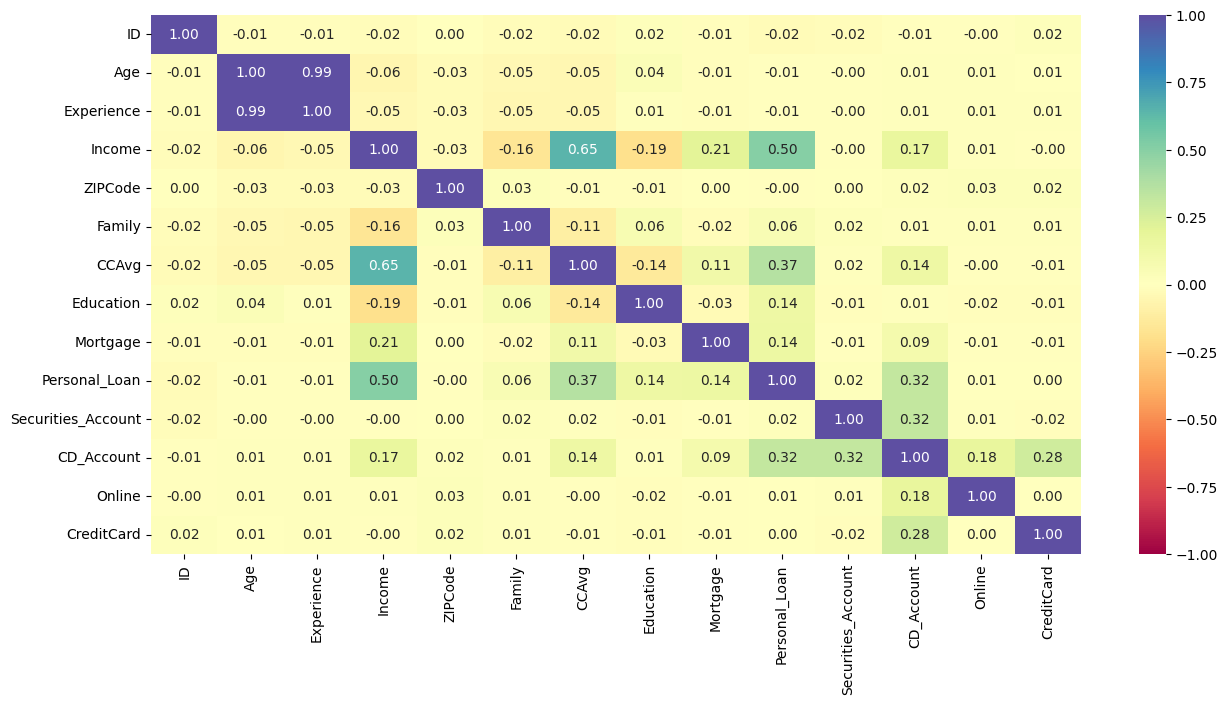

In [387]:
# defining the size of the plot
plt.figure(figsize=(15, 7))

# plotting the heatmap for correlation
sns.heatmap(
    data.corr(),annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
);

In [388]:
# plotting a pairplot
sns.pairplot(data);

Output hidden; open in https://colab.research.google.com to view.

**Observations**



1.   The income and CCAvg values are strongly corelated. It means people having higher income have higher CC avg spend.



## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [389]:
# There are no missing values hence no treatment needed
# There are some outliers but we will not treat them as they are proper values
# Since zipcode should be treated at categorical and not numerical, lets transform the values to city/state and data type category

!pip install pyzipcode
from pyzipcode import ZipCodeDatabase
zcdb = ZipCodeDatabase()
zip_data = []
# these 4 zip codes were not found in the SearchEngine API hence substituted neighbor values by hard coding. Ideally I would ask my domain experts but for this project am taking this approach.
zip_look_up = {92717:"Irvine,CA", 93077:"Belmont,CA", 92634:"Fullerton,CA", 96651:"Eureka,CA"}
for _ in data["ZIPCode"]:
  try:
    zipcode = zcdb[_]
    zip_data.append(zipcode.city + "," + zipcode.state)
  except:
    if _ in zip_look_up:
      if zip_look_up[_]:
        zip_data.append(zip_look_up[_])

# making another copy of data before transforming
data_mod = data.copy()
data_mod["ZIPCode"] = zip_data
data_mod['ZIPCode'] = data_mod['ZIPCode'].astype('category')
data_mod.info()

# dropping ID column as it has unique values
data_mod = data.drop(["ID"], axis=1)

# setting X and Y values
X = data_mod.drop(["Personal_Loan"], axis=1)
Y = data_mod["Personal_Loan"]

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   category
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   int64   
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   int64   
 10  Securities_Account  5000 non-null   int64   
 11  CD_Account          5000 non-null   int64   
 12  Online              5000 non-null   int64   
 13  CreditCard          5000 non-null   int64   
dtypes: category(1), float64(1), int64(12)
memory usage: 527.7 KB


In [390]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 12)
Shape of test set :  (1500, 12)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**



1.   Predicting a customer will not take a loan but in reality, the customer takes the loan (FN)
2.   Predicting a customer will take a loan but in reality, the customer does not take the loan (FP)

**Which case is more important?**

I think FP case is more important as it's loss for the company and waste of resources on marketing campaign etc.

**How to reduce the losses?**

The bank would want the precision to be maximized, greater the precision score higher are the chances of minimizing the False Positives.


In [391]:
# method to determine performance parameters
def measure_model_performance(a, b, c):

    pred = a.predict(b)
    acc = accuracy_score(c, pred)
    recall = recall_score(c, pred)
    precision = precision_score(c, pred)
    f1 = f1_score(c, pred)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [392]:
# method to draw confusion matrix
def draw_confusion_matrix(a, b, c):

    y_pred = a.predict(b)
    cm = confusion_matrix(c, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Model Building

## Decision tree Default

In [393]:
model_1 = DecisionTreeClassifier(random_state=1)
model_1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

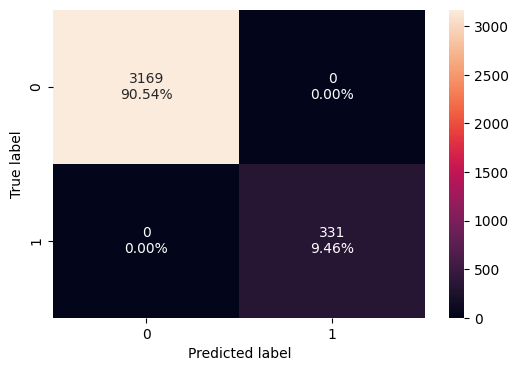

In [394]:
# Confusion matrix with training data
draw_confusion_matrix(model_1, X_train, y_train)

In [395]:
# Performance parameters with training data
decision_tree_default_perf_train = measure_model_performance(
    model_1, X_train, y_train
)
decision_tree_default_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


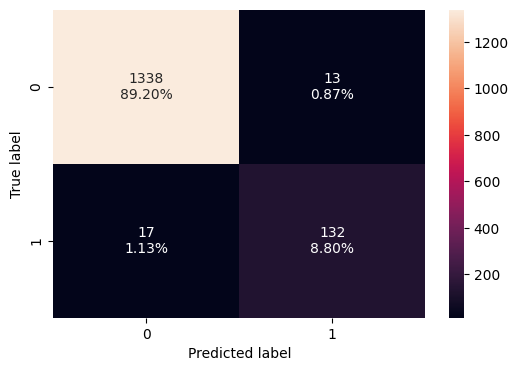

In [396]:
# Confusion matrix with test data
draw_confusion_matrix(model_1, X_test, y_test)

In [397]:
# Performance parameters with test data
decision_tree_default_perf_test = measure_model_performance(
    model_1, X_test, y_test
)
decision_tree_default_perf_test

,Accuracy,Recall,Precision,F1
0,0.98,0.885906,0.910345,0.897959


In [398]:
# Drawing the decision tree
feature_names = list(X_train.columns)
importances = model_1.feature_importances_
indices = np.argsort(importances)

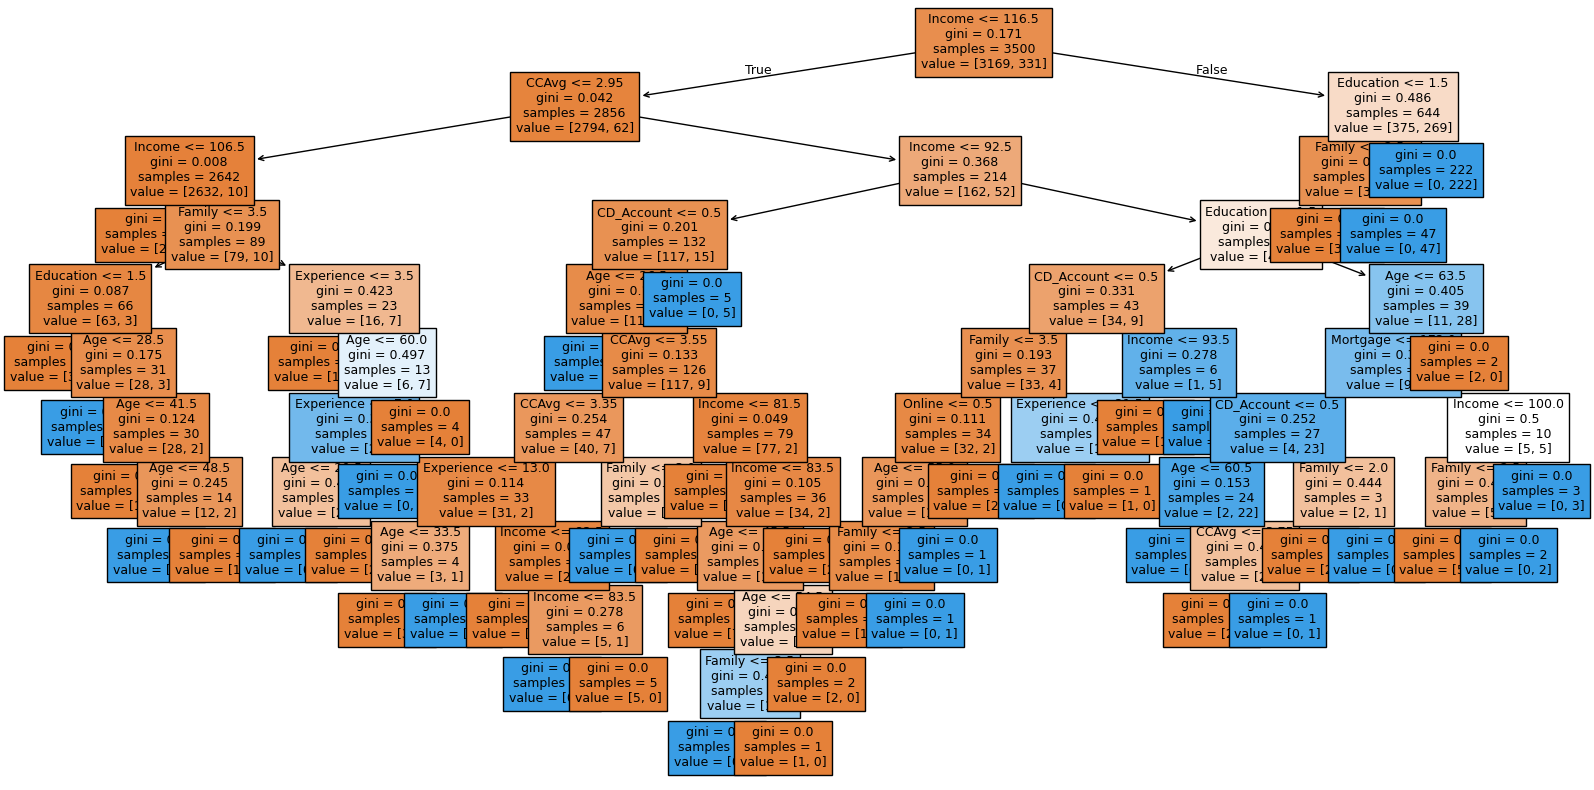

In [399]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model_1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

In [400]:
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

print(tree.export_text(model_1, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [35.00, 0.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- Age <= 41.50
|   |   |   |   |   |   |   |--- weights: [16.00, 0.00] class: 0
|   |   |   |   |   |   |--- Age >  41.50
|   |   |   |   |   |   |   |--- Age <= 48.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |--- Age >  48.50
|   |   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Experience <= 3.50
|   |   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |   |   |--- Experience > 

In [401]:
importances = model_1.feature_importances_
importances

array([0.03570779, 0.01120339, 0.30833648, 0.        , 0.16959277,
       0.04440752, 0.4014654 , 0.00301439, 0.        , 0.02571145,
       0.00056079, 0.        ])

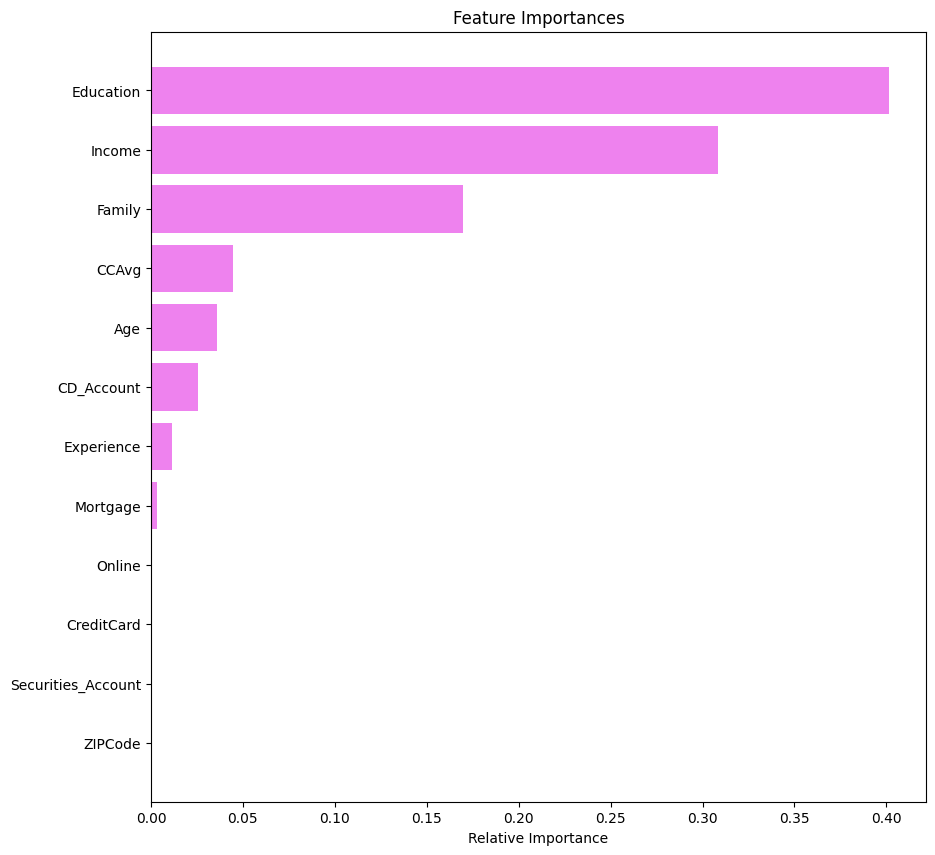

In [402]:
# importance of features in the tree building
importances = model_1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Using the above extracted decision rules we can make interpretations from the decision tree model like:

If the income is greater than 116.5 thousand dollars, education is greater than 1.5, then person is very likely to avail the personal loan.

More decision rules can be implied accordingly.

## Decision tree with class weights

In [403]:
model_2 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model_2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

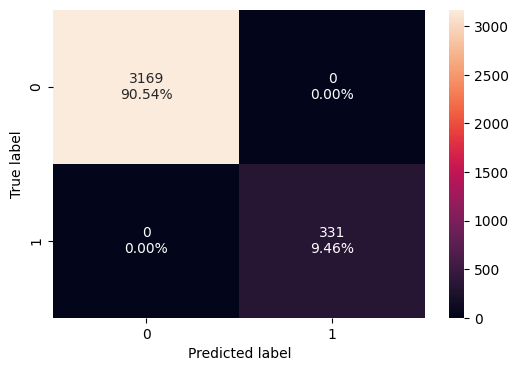

In [404]:
# Confusion matrix with training data
draw_confusion_matrix(model_2, X_train, y_train)

In [405]:
# Performance parameters with training data
decision_tree_balanced_perf_train = measure_model_performance(
    model_2, X_train, y_train
)
decision_tree_balanced_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


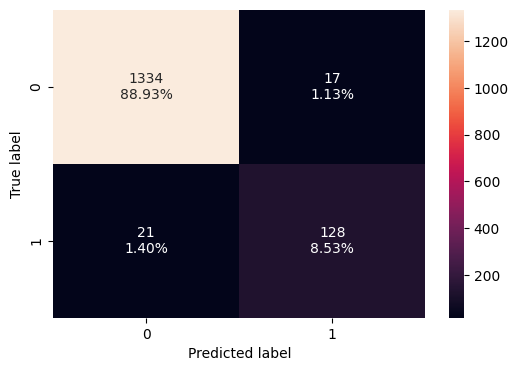

In [406]:
# Confusion matrix with test data
draw_confusion_matrix(model_2, X_test, y_test)

In [407]:
# Performance parameters with training data
decision_tree_balanced_perf_test = measure_model_performance(
    model_2, X_test, y_test
)
decision_tree_balanced_perf_test

,Accuracy,Recall,Precision,F1
0,0.974667,0.85906,0.882759,0.870748


Observation : There is a slight disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

## Model Performance Improvement

### PRE PRUNING

In [408]:
# Defining the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate precision scores for training and test sets
            train_precision_score = precision_score(y_train, y_train_pred)
            test_precision_score = precision_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test precision scores
            score_diff = abs(train_precision_score - test_precision_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_precision_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_precision_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test precision score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test precision score: 0.3104166666666667


In [409]:
# creating an instance of the best model
model_3 = best_estimator

# fitting the best model to the training data
model_3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=42)

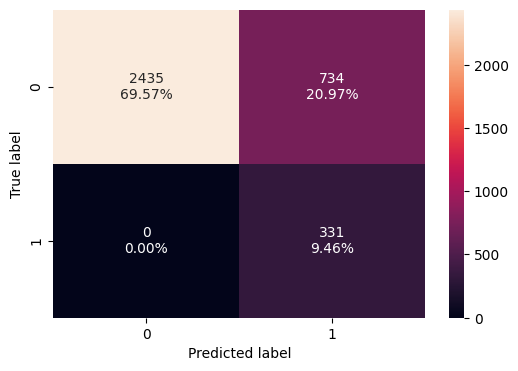

In [410]:
# Confusion matrix with training data
draw_confusion_matrix(model_3, X_train, y_train)

In [411]:
# Performance parameters with training data
decision_tree_prepruned_train = measure_model_performance(
    model_3, X_train, y_train
)
decision_tree_prepruned_train

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


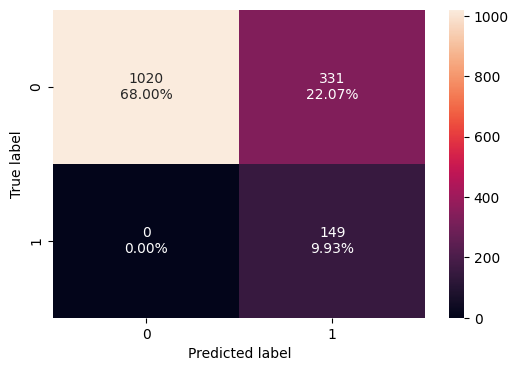

In [412]:
# Confusion matrix with test data
draw_confusion_matrix(model_3, X_test, y_test)

In [413]:
# Performance parameters with training data
decision_tree_prepruned_test = measure_model_performance(
    model_3, X_test, y_test
)
decision_tree_prepruned_test

,Accuracy,Recall,Precision,F1
0,0.779333,1.0,0.310417,0.473768


Observation : The model is giving a generalized result now since the precision scores on both the train and test data are coming to be around 0.31 which shows that the model is able to generalize well on unseen data.

In [414]:
# Drawing the decision tree
feature_names = list(X_train.columns)
importances = model_3.feature_importances_
indices = np.argsort(importances)

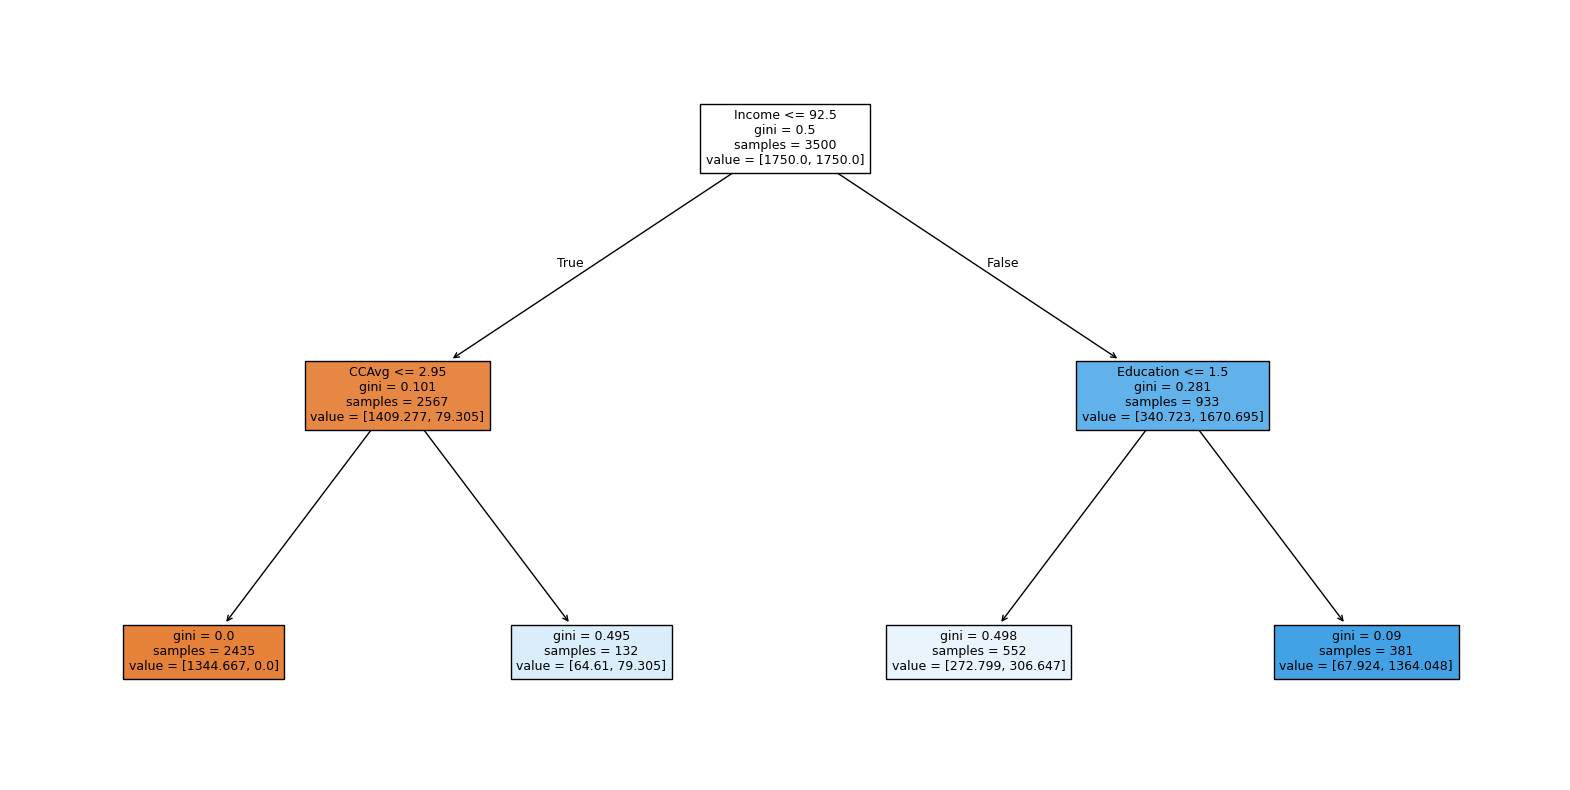

In [415]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model_3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [416]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model_3, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- weights: [272.80, 306.65] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [67.92, 1364.05] class: 1



In [417]:
importances = model_3.feature_importances_
importances

array([0.        , 0.        , 0.82007181, 0.        , 0.        ,
       0.06262835, 0.11729984, 0.        , 0.        , 0.        ,
       0.        , 0.        ])

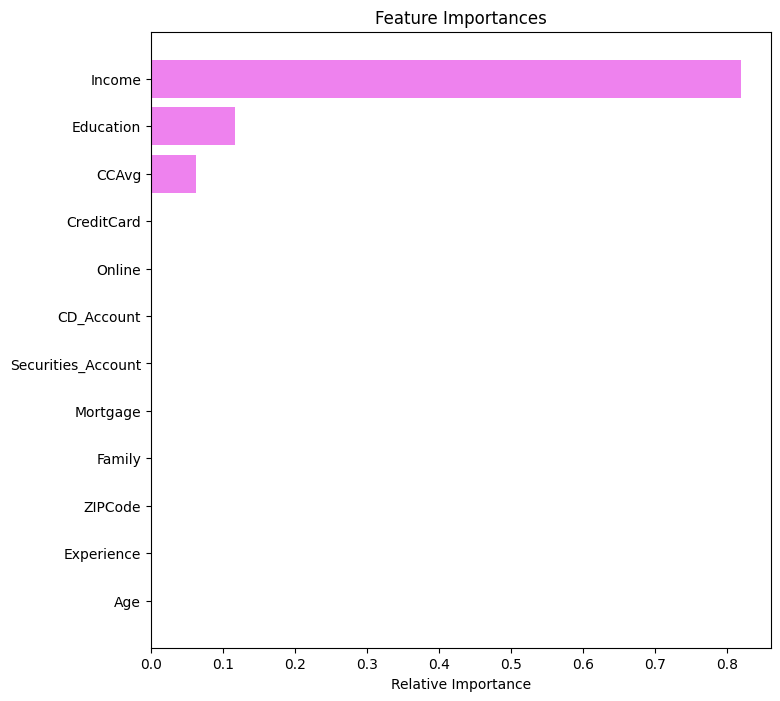

In [418]:
# importance of features in the tree building

importances = model_3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### POST PRUNING

In [419]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-7.194433e-15
1,4.729571e-19,-7.193960e-15
2,5.255079e-19,-7.193434e-15
3,1.051016e-18,-7.192383e-15
4,8.338059e-18,-7.184045e-15
5,1.257806e-17,-7.171467e-15
6,1.524700e-04,3.049400e-04
7,1.537634e-04,6.124667e-04
8,1.561475e-04,9.247618e-04
9,1.568682e-04,1.238498e-03


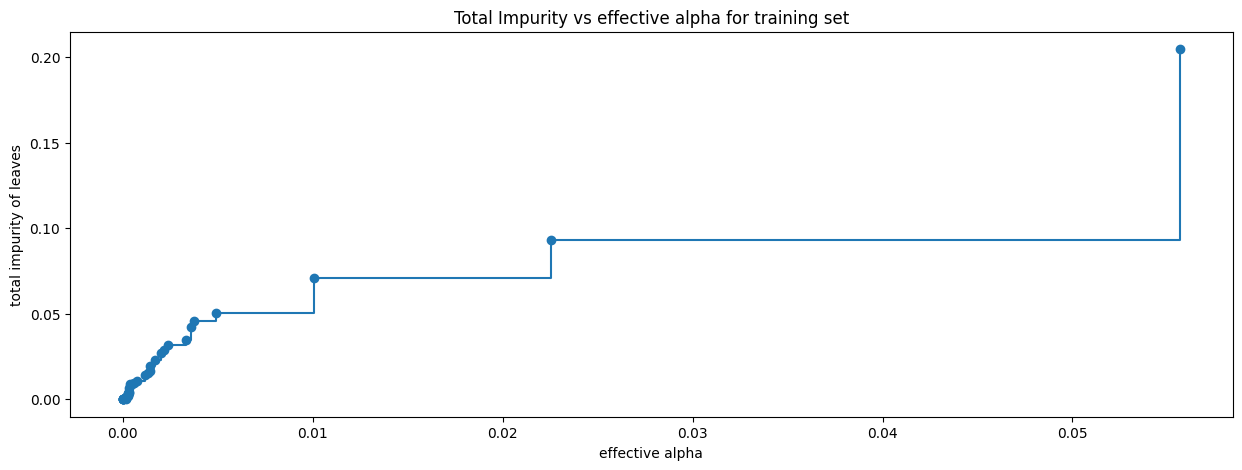

In [420]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [421]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.29537927599923186


Number of nodes in the last tree is: 1 with ccp_alpha: 0.29537927599923186
For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

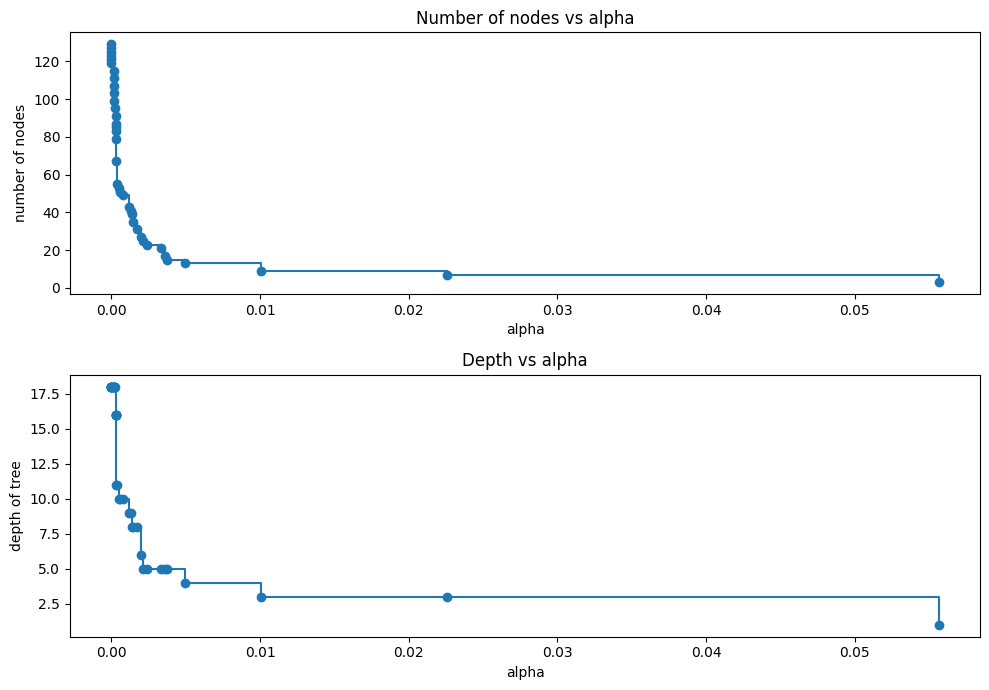

In [422]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [423]:
precision_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = precision_score(y_train, pred_train)
    precision_train.append(values_train)

In [424]:
precision_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = precision_score(y_test, pred_test)
    precision_test.append(values_test)

In [425]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

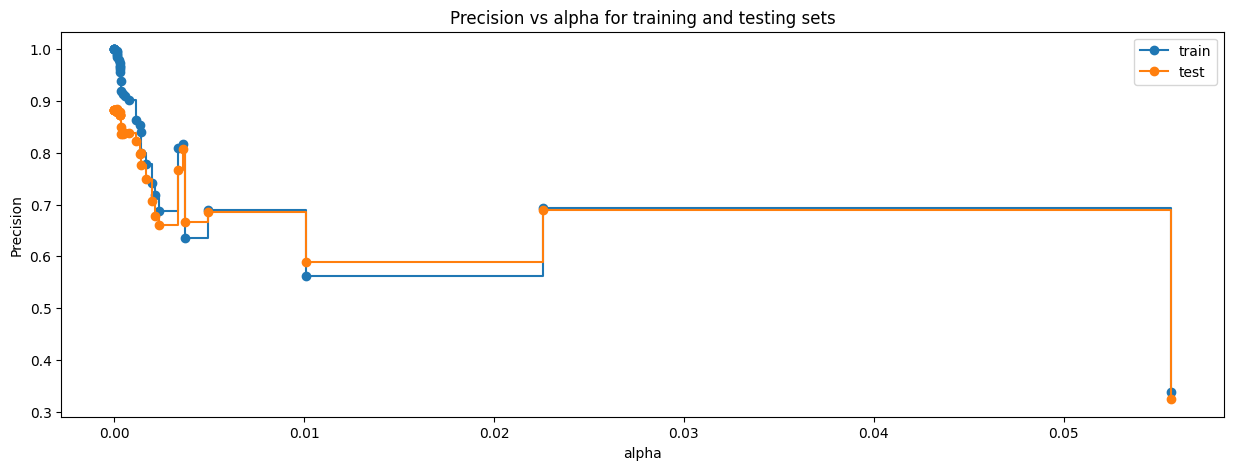

In [426]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Precision")
ax.set_title("Precision vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, precision_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, precision_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [427]:
index_best_model = np.argmax(precision_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00015614752818463517,
                       class_weight='balanced', random_state=1)


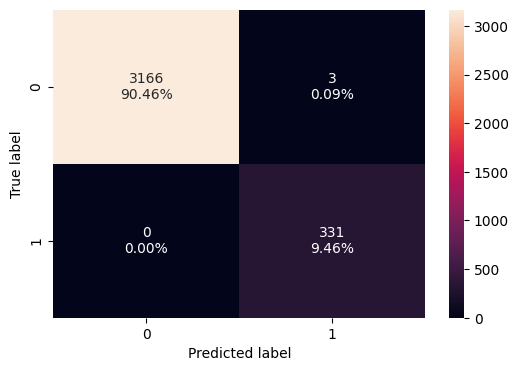

In [428]:
model_4 = best_model
draw_confusion_matrix(model_4, X_train, y_train)

In [429]:
decision_tree_postpruned_train = measure_model_performance(
    model_4, X_train, y_train
)
decision_tree_postpruned_train

,Accuracy,Recall,Precision,F1
0,0.999143,1.0,0.991018,0.995489


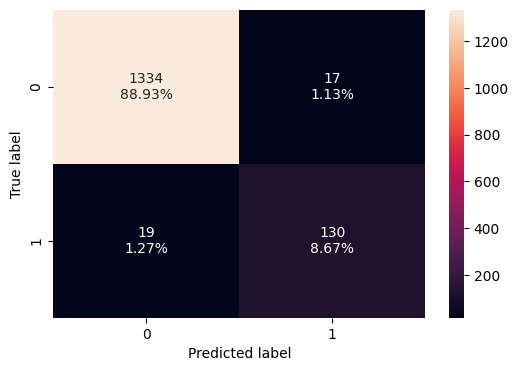

In [430]:
draw_confusion_matrix(model_4, X_test, y_test)

In [431]:
decision_tree_postpruned_test = measure_model_performance(
    model_4, X_test, y_test
)
decision_tree_postpruned_test

,Accuracy,Recall,Precision,F1
0,0.976,0.872483,0.884354,0.878378


In the post-pruned tree also, the model is overfitting since the precision scores are mismatched.

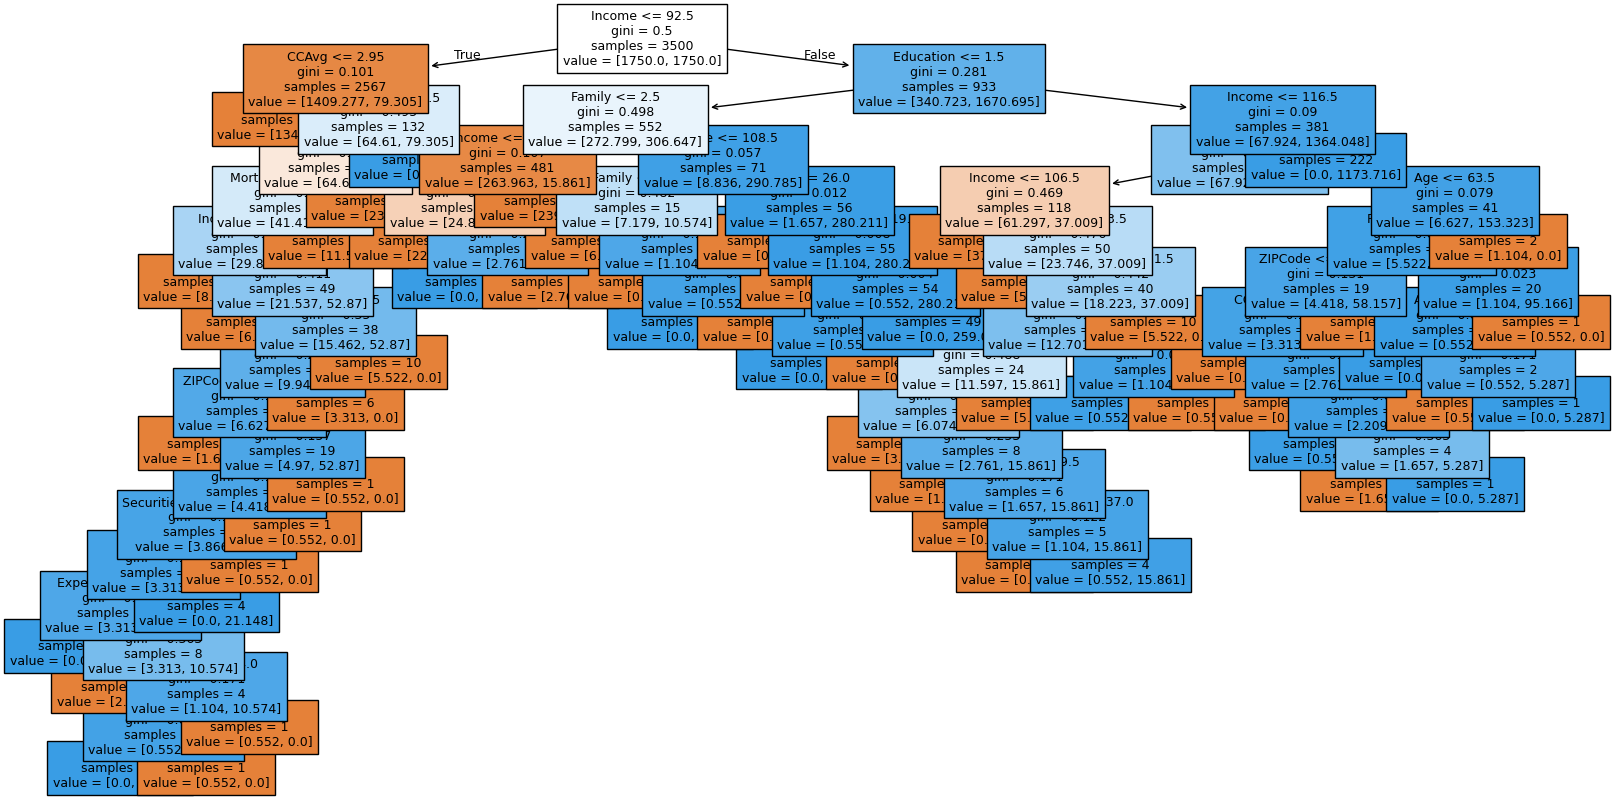

In [432]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model_4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [433]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model_4, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- Income <= 68.50
|   |   |   |   |   |   |--- weights: [8.28, 0.00] class: 0
|   |   |   |   |   |--- Income >  68.50
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |--- weights: [6.07, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |--- ZIPCode <= 94714.50
|   |   |   |   |   |   |   |   |   |--- ZIPCode <= 90437.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [1.66, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- ZIPCode >  90437.50
|   |   |   |   |   |   |   |   |   |   |--- Income <= 91.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- Incom

In [434]:
importances = model_4.feature_importances_
indices = np.argsort(importances)

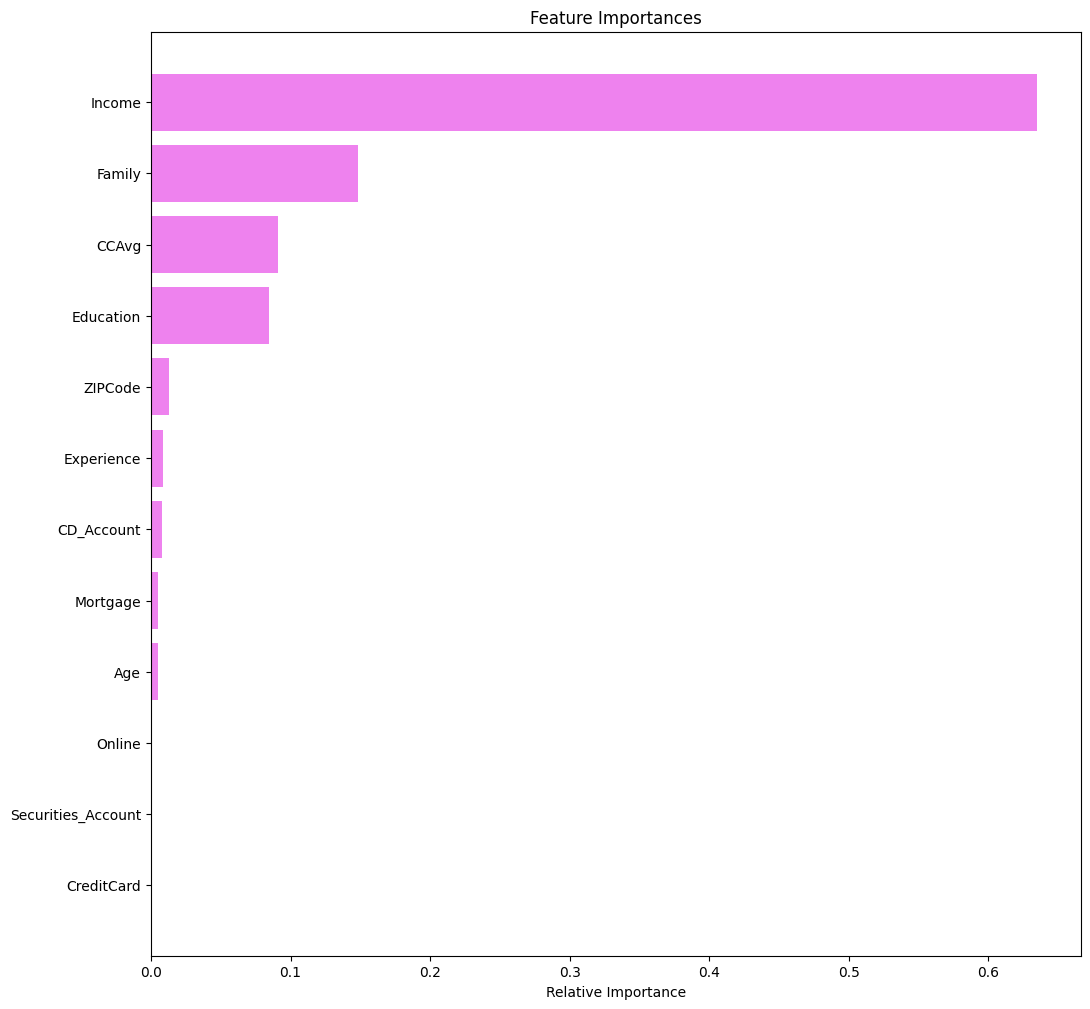

In [435]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Final Model Selection

In [436]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_balanced_perf_train.T,
        decision_tree_prepruned_train.T,
        decision_tree_postpruned_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,0.790286,0.999143
Recall,1.0,1.0,1.000000,1.000000
Precision,1.0,1.0,0.310798,0.991018
F1,1.0,1.0,0.474212,0.995489


In [437]:
# testing performance comparison
models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_balanced_perf_test.T,
        decision_tree_prepruned_test.T,
        decision_tree_postpruned_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.980000,0.974667,0.779333,0.976000
Recall,0.885906,0.859060,1.000000,0.872483
Precision,0.910345,0.882759,0.310417,0.884354
F1,0.897959,0.870748,0.473768,0.878378


The default Decision tree model is giving high precision scores on both training and test sets.
Therefore, we are choosing the default model tree as our best model.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

The model built can be used to predict if a person would avail personal loan with an accuracy of 98%.

Education, Income and Family are most important variables in predication about personal loan.

If the income is greater than 116.5 thousand dollars, education is greater than or equal to 1.5, then person is very likely to avail the personal loan.

The bank use above data for personal loan prediction.

